In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
# Call Weather API 
# Query example: api.openweathermap.org/data/2.5/weather?q=London
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key +"&q="

weather = requests.get(url + city)
weather_json = weather.json()
pprint (weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 3.04, 'lon': 29.53},
 'dt': 1563849389,
 'id': 204283,
 'main': {'grnd_level': 909.62,
          'humidity': 98,
          'pressure': 1013.41,
          'sea_level': 1013.41,
          'temp': 64.48,
          'temp_max': 64.48,
          'temp_min': 64.48},
 'name': 'Watsa',
 'sys': {'country': 'CD',
         'message': 0.0074,
         'sunrise': 1563854410,
         'sunset': 1563898571},
 'timezone': 7200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 168.022, 'speed': 2.3}}


In [4]:
# Create lists for responses
city_name = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
record = 1

# Print statements
print(f'Beginning Data Retrieval')
print(f'-----------------------------')

# Loop through cities
for city in cities:

    try:
        response = requests.get(url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        record_city = response['name']
        print(f'Processing Record {record} | {record_city}')
        
        # Add to record by one per loop
        record = record + 1
        
    except:
        print('City not found. Skipping...')

# Print complete statements
print(f'-----------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Araouane
Processing Record 2 | Hovd
Processing Record 3 | Cabo San Lucas
Processing Record 4 | Nhulunbuy
Processing Record 5 | Burns Lake
Processing Record 6 | Arvika
Processing Record 7 | Hofn
Processing Record 8 | Hobart
Processing Record 9 | Boa Vista
Processing Record 10 | Rikitea
Processing Record 11 | Mount Isa
Processing Record 12 | Te Anau
Processing Record 13 | Rockhampton
Processing Record 14 | Ancud
Processing Record 15 | Charleville-Mezieres
Processing Record 16 | Severo-Kurilsk
Processing Record 17 | Ligayan
Processing Record 18 | Mataura
Processing Record 19 | Kirakira
Processing Record 20 | Hermanus
Processing Record 21 | Puqi
Processing Record 22 | Barrow
Processing Record 23 | Rocha
Processing Record 24 | Ushuaia
Processing Record 25 | Coolum Beach
Processing Record 26 | Nosy Varika
Processing Record 27 | Ko Samui
Processing Record 28 | Atuona
Processing Record 29 | San Jose
Processing Record 

Processing Record 223 | Cayenne
City not found. Skipping...
Processing Record 224 | Namibe
Processing Record 225 | Umm Lajj
Processing Record 226 | Paka
Processing Record 227 | Lazarev
Processing Record 228 | Bubaque
Processing Record 229 | Kholm
Processing Record 230 | Grindavik
Processing Record 231 | Hasaki
Processing Record 232 | Kabinda
Processing Record 233 | Port Hardy
Processing Record 234 | Jinchang
Processing Record 235 | Byron Bay
Processing Record 236 | Livenka
Processing Record 237 | Port Hedland
Processing Record 238 | Kuytun
Processing Record 239 | Rosario
City not found. Skipping...
Processing Record 240 | Champerico
Processing Record 241 | Tornio
Processing Record 242 | Praia da Vitoria
Processing Record 243 | Coihaique
Processing Record 244 | Ahome
Processing Record 245 | Taoudenni
Processing Record 246 | Manalongon
City not found. Skipping...
Processing Record 247 | Ostrovnoy
Processing Record 248 | Luanda
Processing Record 249 | Ipixuna
Processing Record 250 | Aksu


Processing Record 447 | Cascais
Processing Record 448 | Kupang
Processing Record 449 | Ngudu
City not found. Skipping...
Processing Record 450 | North Bend
Processing Record 451 | Oeiras
Processing Record 452 | Riosucio
Processing Record 453 | Panzhihua
Processing Record 454 | Kharan
City not found. Skipping...
Processing Record 455 | Bratsk
Processing Record 456 | Dwarka
Processing Record 457 | Yamethin
Processing Record 458 | Quatre Cocos
Processing Record 459 | Pitlochry
Processing Record 460 | Kuna
Processing Record 461 | Asyut
City not found. Skipping...
Processing Record 462 | Dunedin
Processing Record 463 | Surt
Processing Record 464 | Kultuk
Processing Record 465 | Victor Harbor
Processing Record 466 | Mbandaka
Processing Record 467 | Penarroya-Pueblonuevo
Processing Record 468 | Amberg
Processing Record 469 | Ouro Preto do Oeste
Processing Record 470 | Loa Janan
City not found. Skipping...
Processing Record 471 | Harper
Processing Record 472 | Tura
Processing Record 473 | Tuat

In [8]:
#Create dictionary for all data
weather_dict = {
    'City' : city_name,
    'Cloudiness' : cloudiness, 
    'Country' : country,
    'Date' : date, 
    'Humidity' : humidity,
    'Lat' : latitude, 
    'Lng' : longitude,
    'Max Temp' : max_temp,
    'Wind Speed' : wind_speed
    }
#Convert to dataframe and save as csv
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('weatherpy_data.csv', index = False)
weather_df.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [9]:
#View dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Araouane,100,ML,1563849390,43,18.90,-3.53,87.52,5.75
1,Hovd,0,NO,1563849391,63,63.83,10.70,66.20,9.17
2,Cabo San Lucas,75,MX,1563849391,83,22.89,-109.91,84.00,11.41
3,Nhulunbuy,0,AU,1563849392,51,-12.18,136.78,82.40,18.34
4,Burns Lake,100,CA,1563849392,96,54.23,-125.76,56.56,2.46


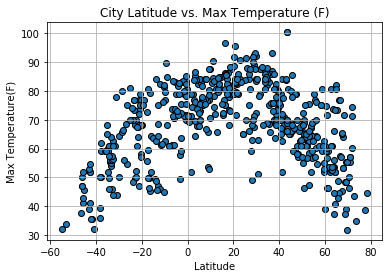

In [17]:
#Create Lat v. Max Temp Chart
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],marker ="o",linewidths=1,edgecolors='black')
plt.title("City Latitude vs. Max Temperature (F)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.savefig("Lat_Temp.png")
plt.show()

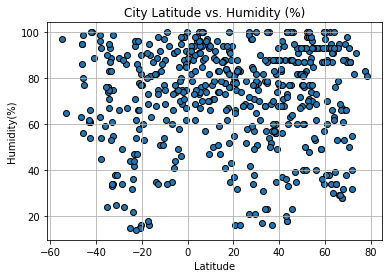

In [18]:
#Create Lat v. Humidity Chart
plt.scatter(weather_df["Lat"],weather_df["Humidity"],marker ="o",linewidths=1,edgecolors='black')
plt.title("City Latitude vs. Humidity (%)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("Lat_Humidity.png")
plt.show()

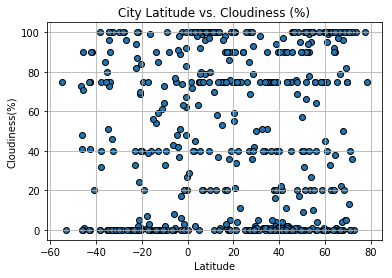

In [19]:
#Create Lat v. Cloudiness Chart
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],marker ="o",linewidths=1,edgecolors='black')
plt.title("City Latitude vs. Cloudiness (%)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Lat_Cloud.png")
plt.show()

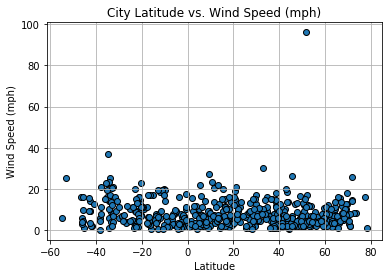

In [20]:
#Create Lat v. Wind Speed Chart
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],marker ="o",linewidths=1,edgecolors='black')
plt.title("City Latitude vs. Wind Speed (mph)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Lat_Wind.png")
plt.show()